<center><h1>Customer Churn Prediction</h1></center>

Customer churn refers to the situation where a customer discontinues their association with a particular company. There can be various reasons behind this decision, such as affordability concerns, dissatisfaction with the product or service, or inadequate customer support.

Frequently, customers who churn from one company tend to move their business to a competitor. For instance, if you are unsatisfied with your current mobile service provider due to slow Internet speed, you are more likely to switch to an alternative provider

The process of churning typically doesn't happen abruptly. If you encounter issues like low network bandwidth, you may endure it for a month or two. During this period, you might contact customer support, assess your network speed, and even share your discontent on social media toughhr reviwv

- The dataset used in this project: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- Dependencies: pandas, matplotlib, seaborn, scikit-learn, Imblearn, colorama | Use the "pip install" command to install the modules

- The ML Model used in this project is the Random Forests model: is a supervised machine learning algorithm. It is one of the most used algorithms due to its accuracy, simplicity, and flexibility. The fact that it can be used for classification and regression tasks, combined with its nonlinear nature, makes it highly adaptable to a range of data and situations


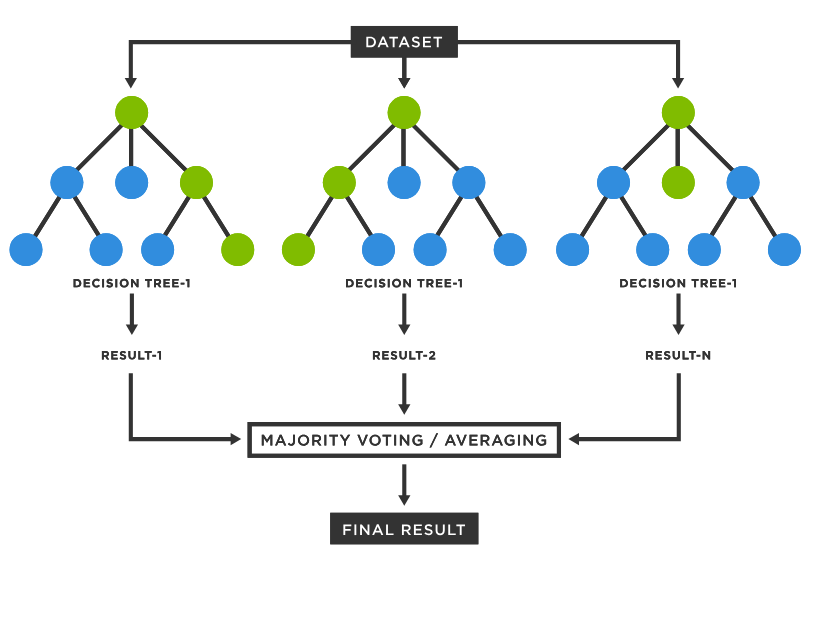ew.


In [1]:
import pandas as pd

In [2]:
# reading data
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Show the data 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
import colorama as color

In [5]:
green_color = color.Back.GREEN
red_color = color.Back.RED
reset_color_fore = color.Fore.RESET

In [6]:
# Shape of the data
shape = df.shape
print(green_color + reset_color_fore + "Number of rows: " + str(shape[0]), "Number of Columns: " + str(shape[1]))

Number of rows: 7043 Number of Columns: 21


In [7]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###### 🛑 Each user is identified through a unique customer ID. There are 19 independent variables used to predict the target feature – customer churn. In this dataset, customer churn is defined as users who have left within the last month.

In [8]:
# We can see that there are no missing values
if df.isnull().sum().sum() == 0:
    print(red_color + "There are no missing values...")

There are no missing values...


In [9]:
# Number of customers who have churned
number_of_customer_churned = df["Churn"].value_counts()
number_of_customer_churned

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
not_churned = (number_of_customer_churned[0] / shape[0] * 100)
churned = "%.0f" % (100 - not_churned)
print("%.0f" % not_churned + f"% of customers who have not churn and {churned}% of customers who have churned.")

73% of customers who have not churn and 27% of customers who have churned.


###### 🛑 We are dealing with an imbalanced classification problem. We will need to perform some feature engineering to create a balanced training dataset before building the predictive model.

<br>

## Exploratory Data Analysis for Customer Churn Prediction

In [11]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

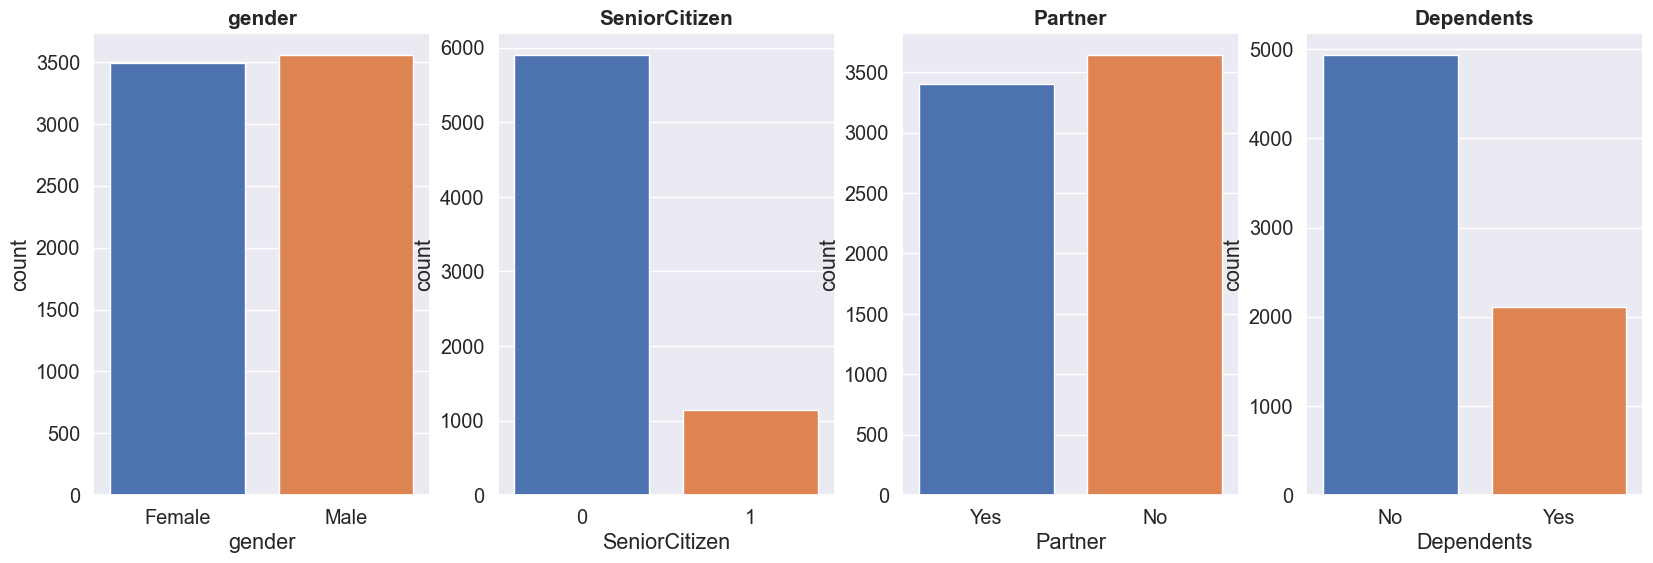

In [12]:
# Analyzing demographic customer data
demographic_cols = ['gender', 'SeniorCitizen', "Partner", "Dependents"]

# Change the figure size
plt.figure(figsize=(20, 6))

sea.set(font_scale = 1.3)
for idx, col in enumerate(demographic_cols):
    ax = plt.subplot(1, len(demographic_cols), idx + 1)
    sea.countplot(x=col, data=df, saturation=1)
    ax.set_title(str(col), fontdict={'size': 15, 'weight': 'bold'})

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

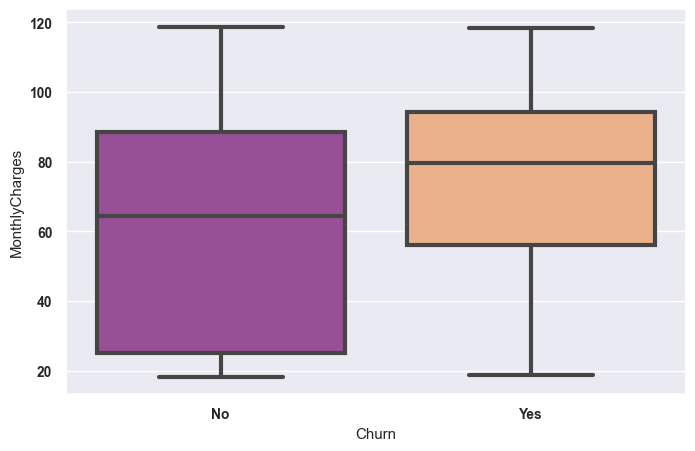

In [13]:
# Change the figure size
plt.figure(figsize=(8, 5))
sea.set(font_scale = 0.9)

# Get the current axes object
ax = plt.gca()

# Set the font weight of x and y tick labels
for xtick_label in ax.get_xticklabels():
    xtick_label.set_weight("bold")

for ytick_label in ax.get_yticklabels():
    ytick_label.set_weight("bold")


# Create a boxplot
sea.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['#a343a2',"#FAAE7B"], linewidth=3)

###### 🛑 we can see that there are no outliers in the data

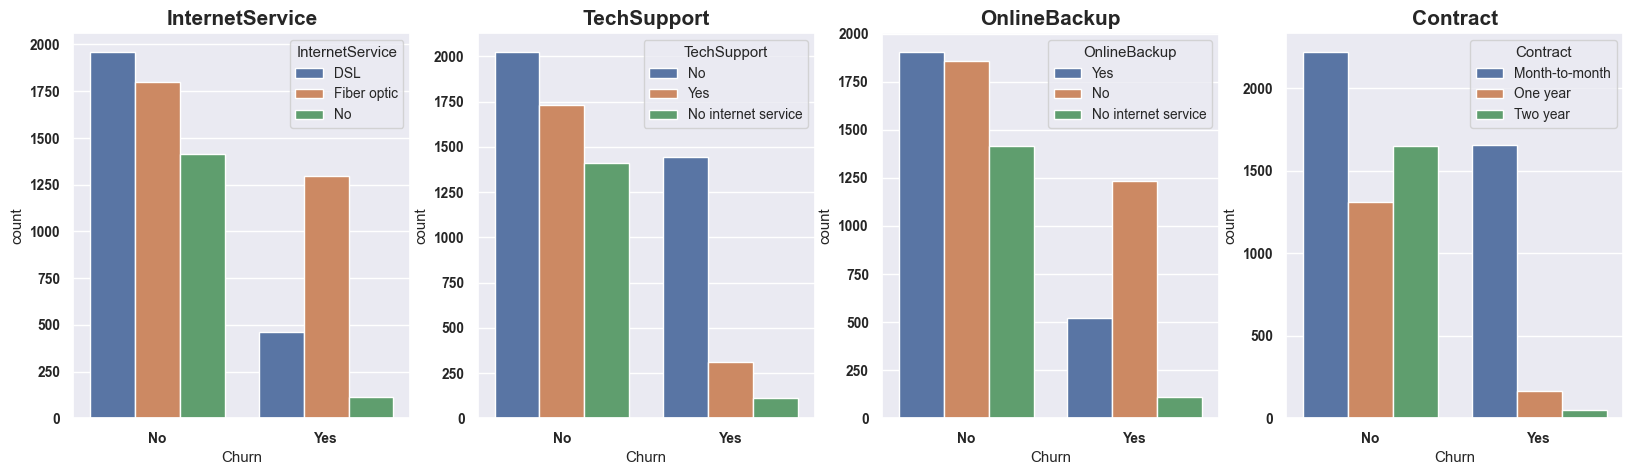

In [14]:
# analyze the relationship between customer churn and a few other categorical variables captured in the dataset

cols = ['InternetService', "TechSupport", "OnlineBackup", "Contract"]

plt.figure(figsize=(20, 5))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sea.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}", fontdict={'size': 15, 'weight': 'bold'})
    
    # Get the current axes object
    ax = plt.gca()
    
    # Set the font-weight of x and y tick labels
    for xtick_label in ax.get_xticklabels():
        xtick_label.set_weight("bold")
    
    for ytick_label in ax.get_yticklabels():
        ytick_label.set_weight("bold")


Let’s look into each attribute:

- InternetService: It is clear from the visual above that customers who use fiber optic Internet churn more often than other users. This might be because fiber Internet is a more expensive service, or this provider doesn’t have good coverage.
- TechSupport: Many users who churned did not sign up for tech support. This might mean that these customers did not receive any guidance on fixing technical issues and decided to stop using the service. 
- OnlineBackup: Many customers who had churned did not sign up for an online backup service for data storage. 
- Contract: Users who churned were almost always on a monthly contract. This makes sense, since these customers pay for the
service on a monthly basis and can easily cancel their subscription before the next payment cycle.

Even without building a fancy machine learning model, a simple data-driven analysis like this can help organizations understand why they are losing customers and what they can do about it. 

For instance, if the company realizes that most of their users who churn have not signed up for tech support, they can include this as a complimentary service in some of their future product offerings to prevent other customers from leaving. 

<br>

## Preprocessing Data for Customer Churn

In [15]:
# Convert the the TotalCharges column from object to numeric column
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

#### Encoding the categorical data

In [16]:
cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)
cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [17]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [18]:
num_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

In [19]:
finaldf.head(3)

,customerID,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,29.85,29.85,0,1,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,1889.50,56.95,0,34,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,108.15,53.85,0,2,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1


<br>
we will use a technique called oversampling. This is a process that involves randomly selecting samples from the minority class and adding it to the training dataset. We are going to oversample the minority class until the number of data points are equal to that of the majority class.

In [20]:
from sklearn.model_selection import train_test_split

finaldf = finaldf.dropna()
finaldf = finaldf.drop(['customerID'],axis=1)

X = finaldf.drop(['Churn'],axis=1)
y = finaldf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from imblearn.over_sampling import SMOTE

# Class to perform over-sampling using SMOTE.
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [22]:
# Check the number of samples in each class to ensure that they are equal
# There should be 3,452 values in each class, which means that the training dataset is now balanced.
y_train.value_counts()

Churn
0    3452
1    3452
Name: count, dtype: int64

In [23]:
# Creatinf and fitting the model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [24]:
# Testing the accuracy of the model
from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.7703576044808272


##### The model accuracy is around 0.77%. It is not so heigh accuracy but for the dataset used in this project it is a good accuracy 

<br>

<center><h1>Good Luck</h1></center>